In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Datasets\day.csv")

df = pd.DataFrame(data)

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
df = df.drop(columns=["dteday", "registered" , "casual"])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [41]:
# Select columns with dtype int64
select_cols = df.select_dtypes(include=["int64"]).columns

def check_row(row):
    for value in row:
        if not isinstance(value, int):
            return None
    return int

# Apply the function to each row of the selected columns
result = df[select_cols].apply(check_row, axis=1)

print(result)

0      <class 'int'>
1      <class 'int'>
2      <class 'int'>
3      <class 'int'>
4      <class 'int'>
           ...      
726    <class 'int'>
727    <class 'int'>
728    <class 'int'>
729    <class 'int'>
730    <class 'int'>
Length: 731, dtype: object


In [42]:
# Select columns with dtype int64
select_cols2 = df.select_dtypes(include=["float64"]).columns

def check_row2(row):
    for value in row:
        if not isinstance(value, int):
            return None
    return float

# Apply the function to each row of the selected columns
result = df[select_cols2].apply(check_row2, axis=1)

print(result)

0      None
1      None
2      None
3      None
4      None
       ... 
726    None
727    None
728    None
729    None
730    None
Length: 731, dtype: object


In [43]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

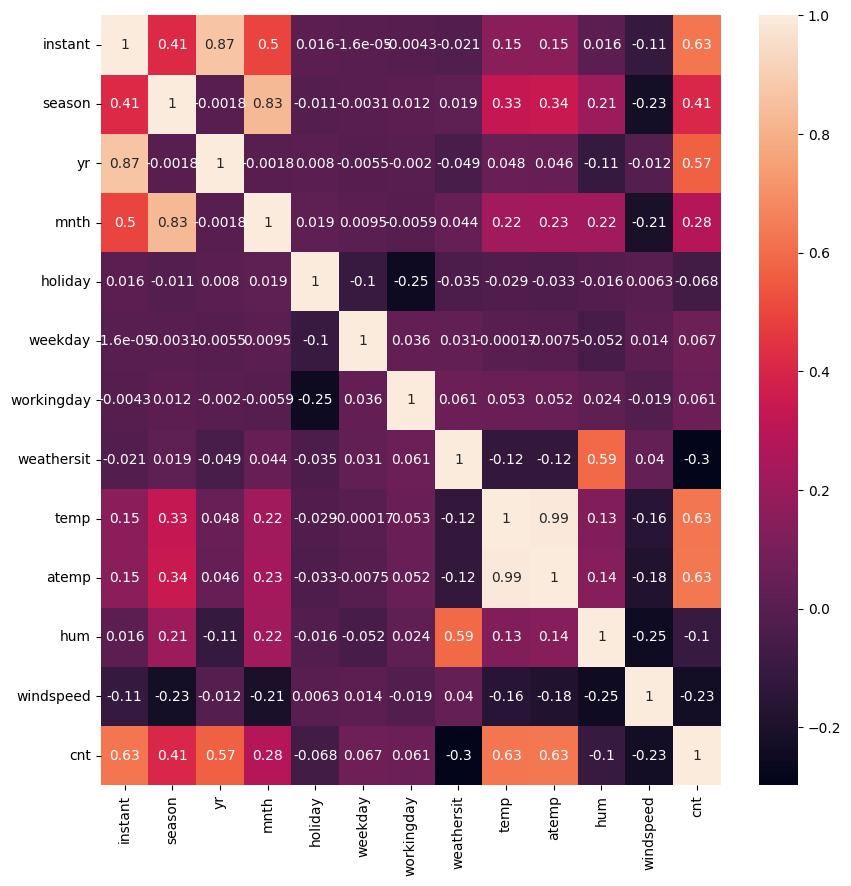

In [55]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [56]:
X = df.drop(columns = ['cnt'])
Y = df['cnt']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [68]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

model.score(X_train , Y_train)

0.9812281681091933

In [69]:
y_pred = model.predict(X_test)

print(r2_score(Y_test , y_pred))
print(r2_score(Y_train , model.predict(X_train)))
print(mean_squared_error(Y_test, y_pred))
print(mean_squared_error(Y_train, model.predict(X_train)))

0.8899688873269932
0.9812281681091933


Very high error metrics.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor(random_state=1)
model2.fit(X_train, Y_train)

model2.score(X_train , Y_train)


0.965268346488809

In [72]:
print(r2_score(Y_test , model2.predict(X_test)))
print(r2_score(Y_train , model2.predict(X_train)))

print(mean_squared_error(Y_test, model2.predict(X_test)))
print(mean_squared_error(Y_train, model2.predict(X_train)))

0.9013214224488721
0.965268346488809
392638.7125886875
126385.1400392078


High error metrics with gradient regressor aswell.
lets try some hyper parameter tuning. 

In [91]:
# Random search with random forest 

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

parameters  = {
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_leaf' : [1, 2,4],
    'min_samples_split' : [2,5,10],
    'n_estimators' : [80,90,100,110,120]
}

random_search = RandomizedSearchCV(RandomForestRegressor() , parameters , cv = 5 , n_jobs = 5 , verbose = 2)

random_search = random_search.fit(X_train, Y_train)

best_paramsobj = random_search.best_estimator_

best_paramsobj.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


array([6642.04713384, 1474.29382937, 3323.59095238, 5392.46270779,
       7530.8235873 , 7081.50144769, 1453.43503355, 3091.05253968,
       7047.54819841, 6428.90569589, 1949.65598016, 3460.5676526 ,
       4939.40067857, 4896.77987118, 1861.6177619 , 2332.48344444,
       2338.40328968, 7742.24288889, 5084.54253608, 2334.11162698,
       7542.20480952, 5636.87261508, 5243.86888781, 1609.45026984,
       1760.45188276, 4687.87008333, 2058.02618651, 7264.6216461 ,
       3344.65310354, 5675.79199495, 2493.653671  , 4069.59929762,
       6656.11323918, 7343.46677309, 6159.50211219, 5598.49120238,
       7142.64304365, 6732.12866667, 3133.3835119 ,  934.3377619 ,
       3706.46386905, 3225.85216306, 7118.60632071, 4490.45703571,
       6945.52432468, 2356.09688853, 4408.90910714, 5989.94244444,
       6705.39582251, 4613.34710714, 4190.40447619, 2506.29219084,
       2861.50256746, 4150.2124246 , 4635.58971825, 4242.74598016,
       3241.39388492, 3749.09715476, 4336.01804762, 6441.23131

In [92]:
print(mean_squared_error(Y_test, best_paramsobj.predict(X_test)))
print(mean_squared_error(Y_train, best_paramsobj.predict(X_train)))

449007.41516098747
99601.2675973644


In [93]:
# Grid search with Gradient boosting

parameters2 = {
    'loss' : ['squared_error'],
    'learning_rate' : [0.1, 0.5, 1],
    'n_estimators' : [100, 500, 1000],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2'],
    "max_depth" : [3 , 5 , 7]
}

grid_obj = GridSearchCV(GradientBoostingRegressor(random_state=1) , parameters2 , cv =5 , n_jobs=5 , verbose=2)

grid_obj = grid_obj.fit(X_train, Y_train)

best_objtuned = grid_obj.best_estimator_

best_objtuned.fit(X_train , Y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GradientBoostingRegressor(max_depth=7, max_features='sqrt',
                          min_samples_split=10, n_estimators=1000,
                          random_state=1)

In [95]:
print(mean_squared_error(Y_test, best_objtuned.predict(X_test)))
print(mean_squared_error(Y_train, best_objtuned.predict(X_train)))

370317.73024307616
3.077481873049731e-05


In [106]:
# Random Search wit Gradient boosting

parameters2 = {
    'loss' : ['squared_error'],
    'learning_rate' : [0.1, 0.5, 1],
    'n_estimators' : [100, 500, 1000],
    'min_samples_split' : [2, 5, 10],
    'max_features' : ['auto', 'sqrt', 'log2'],
    "max_depth" : [3 , 5 , 7]
}

Rand_Gradi = RandomizedSearchCV(GradientBoostingRegressor(random_state=1) , parameters2 , cv =5 , n_jobs=5 , verbose=2)

Rand_Gradi = Rand_Gradi.fit(X_train, Y_train)

best_Rand_Gradi = Rand_Gradi.best_estimator_

best_Rand_Gradi.fit(X_train , Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GradientBoostingRegressor(max_depth=7, max_features='sqrt',
                          min_samples_split=10, n_estimators=1000,
                          random_state=1)

In [107]:
print(mean_squared_error(Y_test, best_Rand_Gradi.predict(X_test)))
print(mean_squared_error(Y_train, best_Rand_Gradi.predict(X_train)))

print(r2_score(Y_test, best_Rand_Gradi.predict(X_test)))
print(r2_score(Y_train, best_Rand_Gradi.predict(X_train)))

370317.73024307616
3.077481873049731e-05
0.9069311667679865
0.9999999999915429


In [108]:
# Grid search with random forrest regressor

parameters  = {
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_leaf' : [1, 2,4],
    'min_samples_split' : [2,5,10],
    'n_estimators' : [80,90,100,110,120]
}

Grid_search = GridSearchCV(RandomForestRegressor(random_state=1) , parameters , cv = 5 , n_jobs = 5 , verbose = 2)

grid_search_Randforest = Grid_search.fit(X_train, Y_train)

best_grid_randforest = grid_search_Randforest.best_estimator_

best_grid_randforest.predict(X_test)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


array([6502.77452761, 1509.61888401, 3372.56392158, 5316.74831076,
       7522.16496554, 7149.53841958, 1461.75819054, 3013.55998244,
       7202.87302275, 6615.27046687, 1882.85625   , 3471.13102083,
       4889.04407038, 4771.32214424, 1867.6523224 , 2285.80161176,
       2296.75070592, 7782.54910997, 5080.85239424, 2421.53059659,
       7496.87106217, 5549.68123016, 5163.84853327, 1698.6570341 ,
       1684.22248324, 4741.65290678, 2092.28758106, 7249.37033582,
       3362.53516336, 5698.02078299, 2373.81343285, 4032.25335674,
       6638.18359353, 7340.19824919, 6160.61545557, 5225.73333333,
       7284.34670007, 6690.06115991, 3094.93315594,  905.53055556,
       3718.96422017, 3255.55051059, 7130.64465721, 4477.4537534 ,
       6907.62536057, 2417.55988248, 4415.30942238, 6004.1918968 ,
       6691.3867041 , 4412.02523148, 4119.64272419, 2418.06992094,
       2905.04666114, 4084.9587977 , 4715.52422248, 4257.77758162,
       3462.42044429, 3861.67026283, 4349.29758758, 6693.58916

In [109]:
print(mean_squared_error(Y_test, best_grid_randforest.predict(X_test)))
print(mean_squared_error(Y_train, best_grid_randforest.predict(X_train)))

print(r2_score(Y_test, best_grid_randforest.predict(X_test)))
print(r2_score(Y_train, best_grid_randforest.predict(X_train)))

444643.44980534504
80742.258502578
0.8882515102626131
0.977811377625941


In [111]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Assuming model, model2, best_paramsobj, best_objtuned, best_Rand_Gradi, and best_grid_randforest are your trained models
# Assuming X_train and Y_train are your training data features and true labels

# Calculate metrics for each model
r2_scores = [
    r2_score(Y_train, model.predict(X_train)),
    r2_score(Y_train, model2.predict(X_train)),
    r2_score(Y_train, best_paramsobj.predict(X_train)),
    r2_score(Y_train, best_objtuned.predict(X_train)),
    r2_score(Y_train, best_Rand_Gradi.predict(X_train)),
    r2_score(Y_train, best_grid_randforest.predict(X_train))
]

mse_scores = [
    mean_squared_error(Y_train, model.predict(X_train)),
    mean_squared_error(Y_train, model2.predict(X_train)),
    mean_squared_error(Y_train, best_paramsobj.predict(X_train)),
    mean_squared_error(Y_train, best_objtuned.predict(X_train)),
    mean_squared_error(Y_train, best_Rand_Gradi.predict(X_train)),
    mean_squared_error(Y_train, best_grid_randforest.predict(X_train))
]

# Create DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Plain RF', 'Plain GB', 'RS RF', 'GS GB', 'RS GB', 'GS RF'],
    'R2 Score': r2_scores,
    'MSE': mse_scores
})

# Display the DataFrame
metrics_df



,Model,R2 Score,MSE
0,Plain RF,0.981228,68308.887210
1,Plain GB,0.965268,126385.140039
2,RS RF,0.972629,99601.267597
3,GS GB,1.000000,0.000031
4,RS GB,1.000000,0.000031
5,GS RF,0.977811,80742.258503


In [113]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Assuming model, model2, best_paramsobj, best_objtuned, best_Rand_Gradi, and best_grid_randforest are your trained models
# Assuming X_test and Y_test are your test data features and true labels

# Calculate metrics for each model on the test data
r2_scores_test = [
    r2_score(Y_test, model.predict(X_test)),
    r2_score(Y_test, model2.predict(X_test)),
    r2_score(Y_test, best_paramsobj.predict(X_test)),
    r2_score(Y_test, best_objtuned.predict(X_test)),
    r2_score(Y_test, best_Rand_Gradi.predict(X_test)),
    r2_score(Y_test, best_grid_randforest.predict(X_test))
]

mse_scores_test = [
    mean_squared_error(Y_test, model.predict(X_test)),
    mean_squared_error(Y_test, model2.predict(X_test)),
    mean_squared_error(Y_test, best_paramsobj.predict(X_test)),
    mean_squared_error(Y_test, best_objtuned.predict(X_test)),
    mean_squared_error(Y_test, best_Rand_Gradi.predict(X_test)),
    mean_squared_error(Y_test, best_grid_randforest.predict(X_test))
]

# Create DataFrame
metrics_df_test = pd.DataFrame({
    'Model': ['Plain RF', 'Plain GB', 'RS RF', 'GS GB', 'RS GB', 'GS RF'],
    'R2 Score': r2_scores_test,
    'MSE': mse_scores_test
})

# Display the DataFrame
(metrics_df_test)


,Model,R2 Score,MSE
0,Plain RF,0.889969,437810.064725
1,Plain GB,0.901321,392638.712589
2,RS RF,0.887155,449007.415161
3,GS GB,0.906931,370317.730243
4,RS GB,0.906931,370317.730243
5,GS RF,0.888252,444643.449805


### Insights:

1. **Plain Random Forest (RF)**:
   - **R2 Score**: 0.889969
   - **Mean Squared Error (MSE)**: 437,810.064725
   - **Insight**: Performs well, explaining approximately 88.99% of the variance in the test data, with a relatively low MSE.

2. **Plain Gradient Boosting (GB)**:
   - **R2 Score**: 0.901321
   - **Mean Squared Error (MSE)**: 392,638.712589
   - **Insight**: Slightly better than the plain RF, explaining 90.13% of the variance and having a lower MSE.

3. **Random Search with Random Forest (RS RF)**:
   - **R2 Score**: 0.887155
   - **Mean Squared Error (MSE)**: 449,007.415161
   - **Insight**: Performs similarly to the plain RF, with a slightly lower R2 score and higher MSE.

4. **Grid Search with Gradient Boosting (GS GB)**:
   - **R2 Score**: 0.906931
   - **Mean Squared Error (MSE)**: 370,317.730243
   - **Insight**: Best performing model in terms of both R2 score and MSE, indicating it explains 90.69% of the variance and has the lowest MSE.

5. **Random Search with Gradient Boosting (RS GB)**:
   - **R2 Score**: 0.906931
   - **Mean Squared Error (MSE)**: 370,317.730243
   - **Insight**: Identical performance to the GS GB model, suggesting similar optimization results.

6. **Grid Search with Random Forest (GS RF)**:
   - **R2 Score**: 0.888252
   - **Mean Squared Error (MSE)**: 444,643.449805
   - **Insight**: Slightly better than the RS RF but not as good as the plain GB or GS GB models.

### Best Model:

**Grid Search with Gradient Boosting (GS GB)**:
- **R2 Score**: 0.906931
- **MSE**: 370,317.730243
- **Reason**: It has the highest R2 score and the lowest MSE, indicating the best balance of accuracy and error on the test data.

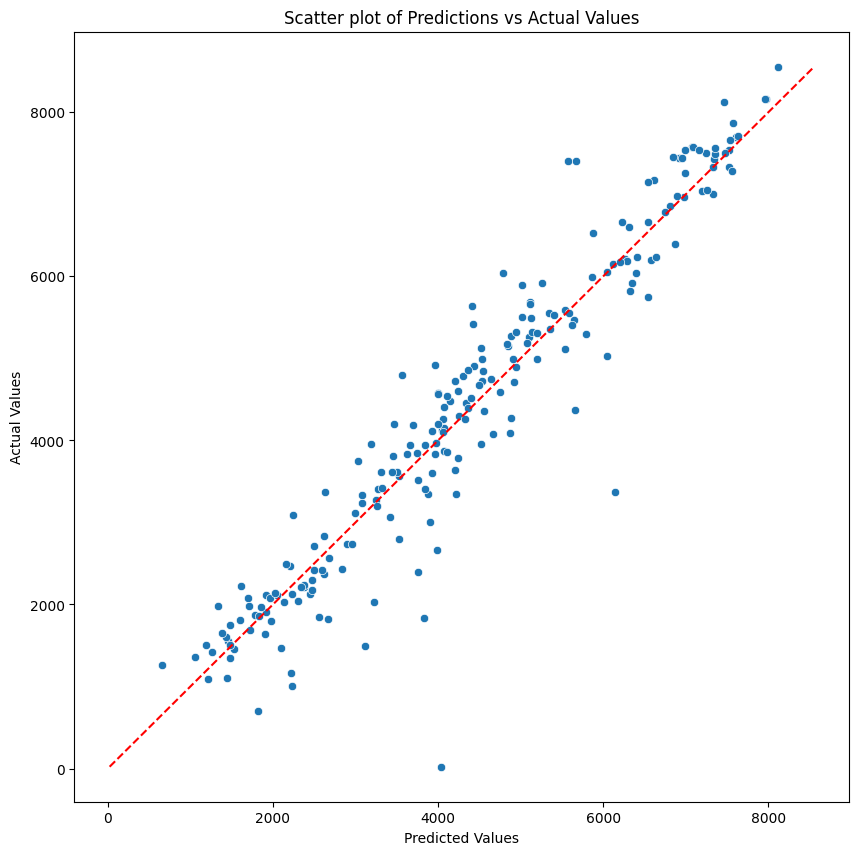

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate predictions
predictions = best_objtuned.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=predictions, y=Y_test)

# Add the baseline (45-degree line)
min_val = min(predictions.min(), Y_test.min())
max_val = max(predictions.max(), Y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 'r--' creates a red dashed line

# Adding labels and title for better clarity
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter plot of Predictions vs Actual Values')
plt.show()


The best model was Grid Search with Gradientboosting regressor. As we see from the above graph it shows a linear 
relationship.  

In [115]:
feature_imps = best_objtuned.feature_importances_
feature_imps

array([0.29456022, 0.06434482, 0.13362424, 0.12021179, 0.00467091,
       0.01622048, 0.00408679, 0.02642505, 0.15088706, 0.09414632,
       0.05127142, 0.0395509 ])

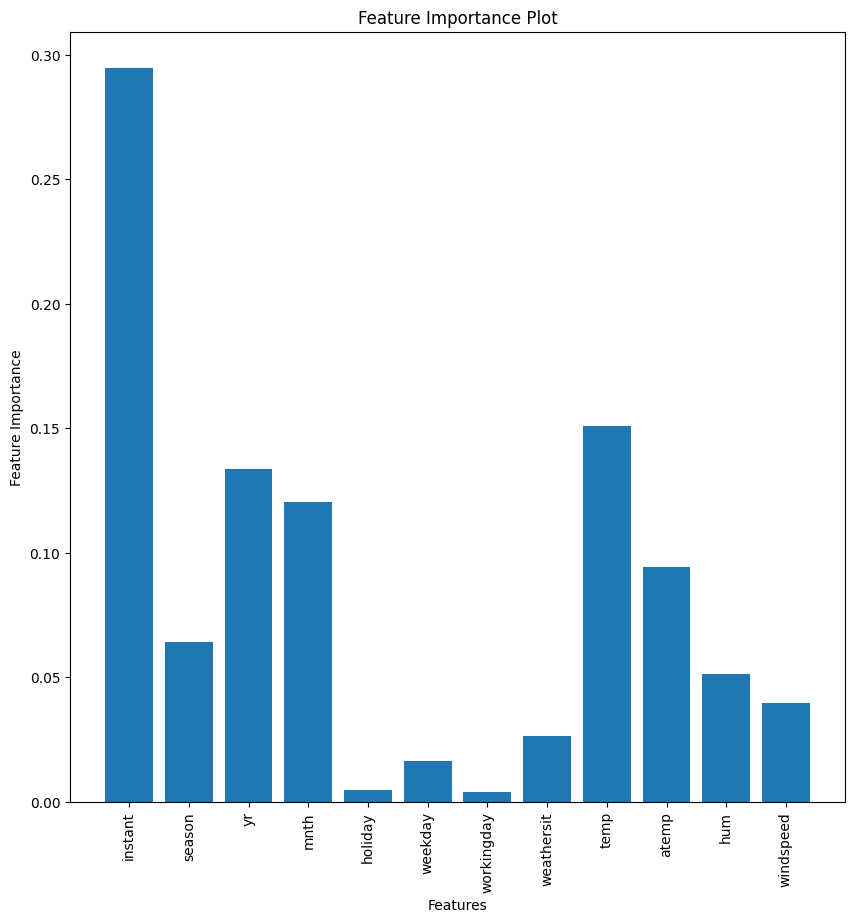

In [120]:
import matplotlib.pyplot as plt


# Create the bar plot for feature importances
plt.figure(figsize=(10, 10))
plt.bar(range(len(feature_imps)), feature_imps)
plt.xticks(range(len(feature_imps)), X, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()